In [4]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import random

from scipy.stats import linregress

In [5]:
#Kaggle cmd will download zip to current file directory -kaggle.json in User folder .kaggle folder
!kaggle datasets download -d zynicide/wine-reviews --force -p ../Resources


  0%|          | 0.00/50.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.9M [00:23<19:39, 44.3kB/s]
  4%|3         | 2.00M/50.9M [00:25<13:54, 61.4kB/s]
  6%|5         | 3.00M/50.9M [00:26<09:41, 86.3kB/s]
  8%|7         | 4.00M/50.9M [00:26<06:44, 122kB/s] 
 10%|9         | 5.00M/50.9M [00:26<04:41, 171kB/s]
 12%|#1        | 6.00M/50.9M [00:26<03:16, 240kB/s]
 14%|#3        | 7.00M/50.9M [00:27<02:16, 336kB/s]
 16%|#5        | 8.00M/50.9M [00:27<01:36, 468kB/s]
 18%|#7        | 9.00M/50.9M [00:27<01:07, 648kB/s]
 20%|#9        | 10.0M/50.9M [00:27<00:48, 884kB/s]
 22%|##1       | 11.0M/50.9M [00:27<00:34, 1.20MB/s]
 24%|##3       | 12.0M/50.9M [00:28<00:25, 1.59MB/s]
 26%|##5       | 13.0M/50.9M [00:28<00:19, 2.06MB/s]
 28%|##7       | 14.0M/50.9M [00:28<00:15, 2.54MB/s]
 29%|##9       | 15.0M/50.9M [00:28<00:11, 3.16MB/s]
 31%|###1      | 16.0M/50.9M [00:28<00:09, 3.76MB/s]
 33%|###3      | 17.0M/50.9M [00:28<00:08, 4.25MB/s]
 35%|###5      | 18.0M/50.9M [00:29<00:07, 4.67MB/s]
 37%|##

In [6]:
#Unzip Kaggle Data
import zipfile

Dataset = "wine-reviews"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(f"../Resources/{Dataset}.zip","r") as z:
    z.extractall("../Resources")

In [7]:
# Reading csv and cleaning column names
df = pd.read_csv('../Resources/winemag-data-130k-v2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
# pandas drop a column with drop function
df.drop(['taster_twitter_handle'], axis=1)


,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [9]:
country = df['country'].value_counts()
country1 = country.iloc[0:5]

In [10]:
price = df['price'].value_counts()
price1 = price.iloc[0:5]

In [11]:
region = df['region_1'].value_counts()
region1 = region.iloc[0:5]

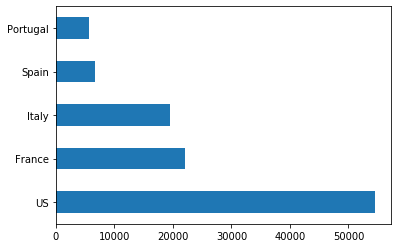

In [12]:
country1.plot(kind='barh')

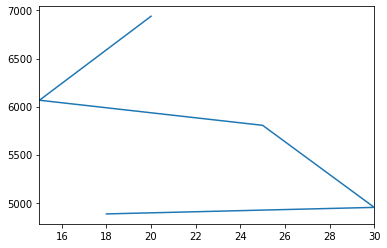

In [13]:
price1.plot(kind='line')

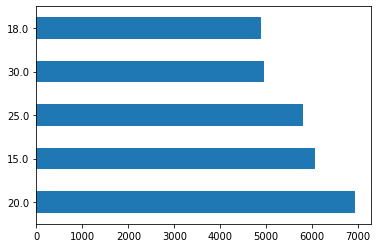

In [14]:
price1.plot(kind='barh')

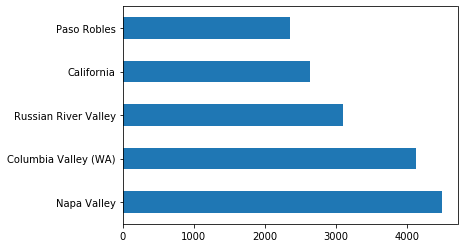

In [15]:
region1.plot(kind='barh')

In [16]:
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

In [21]:
# Group by Country and Different regions

grouped_df = df.groupby(['country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head(10)

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,
Argentina,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Armenia,2,2,2,2,2,0,0,2,2,2,2,2
Australia,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329
Austria,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Bosnia and Herzegovina,2,1,2,2,2,0,0,2,1,2,2,2
Brazil,52,51,52,47,52,0,0,52,52,52,52,52
Bulgaria,141,93,141,141,141,0,0,141,122,141,141,141
Canada,257,179,257,254,257,257,0,256,241,257,257,257
Chile,4472,3879,4472,4416,4472,0,0,4361,4361,4472,4471,4472


In [23]:
grouped_df = df.groupby(['region_1'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head(10)

,country,description,designation,points,price,province,region_2,taster_name,taster_twitter_handle,title,variety,winery
region_1,,,,,,,,,,,,
Abruzzo,6,6,5,6,6,6,0,1,1,6,6,6
Adelaida District,110,110,91,110,110,110,110,110,110,110,110,110
Adelaide,16,16,15,16,16,16,0,15,15,16,16,16
Adelaide Hills,107,107,66,107,105,107,0,94,94,107,107,107
Adelaide Plains,4,4,0,4,4,4,0,4,4,4,4,4
Aglianico d'Irpinia,1,1,0,1,1,1,0,0,0,1,1,1
Aglianico del Beneventano,2,2,2,2,2,2,0,1,1,2,2,2
Aglianico del Taburno,13,13,11,13,11,13,0,2,2,13,13,13
Aglianico del Vulture,90,90,74,90,74,90,0,54,54,90,90,90


In [24]:
grouped_df = df.groupby(['region_2'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head(10)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
region_2,,,,,,,,,,,,
California Other,2663,2663,1261,2663,2661,2663,2663,1236,1236,2663,2663,2663
Central Coast,11065,11065,7902,11065,10975,11065,11065,6515,6515,11065,11065,11065
Central Valley,1062,1062,678,1062,1058,1062,1062,928,928,1062,1062,1062
Columbia Valley,8103,8103,5572,8103,8058,8103,8103,8096,8096,8103,8103,8103
Finger Lakes,1777,1777,1232,1777,1768,1777,1777,1707,151,1777,1777,1777
Long Island,680,680,471,680,677,680,680,665,76,680,680,680
Napa,6814,6814,4207,6814,6804,6814,6814,2937,2937,6814,6814,6814
Napa-Sonoma,1169,1169,774,1169,1169,1169,1169,547,547,1169,1169,1169
New York Other,231,231,164,231,231,231,231,225,16,231,231,231
